In [ ]:
# Real Estate Price Prediction:
# Below is the process  for real estate price prediction to help individuals and businesses make informed decisions in the real estate market:

# Gather relevant data from various sources, including real estate databases, government records, online listings, and other public or private sources.
# Clean and prepare the collected data by handling missing values, removing outliers, and converting categorical variables into numerical representations.
# Create new features or transform existing ones to capture important information that can influence real estate prices.
# Explore and visualize the data to gain insights into its distribution, correlations, and patterns.
# Choose appropriate machine learning algorithms or predictive models for the task.
# Train the selected model on the training data, optimizing its parameters to make accurate predictions.
# For the task of Real Estate Price Prediction, we need historical data with various features that can influence property prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [3]:
# Load the dataset 
real_estate_data = pd.read_csv(r"C:\Users\alexq\Desktop\-Kuki-Qyps-\practis\my_ds_env\DATASETS\Real_Estate.csv")
# Display the first few rows of the dataset and the info about the dataset
real_estate_data_head = real_estate_data.head()
data_info = real_estate_data.info()

print(real_estate_data_head)
print(data_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144

In [ ]:
# The dataset contains 7 columns. Here’s a brief overview of the columns:

# 1.Transaction date: The date of the real estate transaction.
# 2.House age: Age of the house in years.
# 3.Distance to the nearest MRT station: Distance to the nearest Mass Rapid Transit station in meters.
# 4.Number of convenience stores: Number of convenience stores in the vicinity.
# 5.Latitude: Latitude of the property location.
# 6.Longitude: Longitude of the property location.
# 7.House price of unit area: House price of unit area.


In [4]:
# Check the data contains any null values or not
print(real_estate_data.isnull().sum())

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


In [31]:
# There are no null values in the dataset. 
#Checking Descriptive statistics of the dataset:
descriptive_stats = real_estate_data.describe()
print(descriptive_stats)

        House age  Distance to the nearest MRT station  \
count  414.000000                           414.000000   
mean    18.405072                          1064.468233   
std     11.757670                          1196.749385   
min      0.000000                            23.382840   
25%      9.900000                           289.324800   
50%     16.450000                           506.114400   
75%     30.375000                          1454.279000   
max     42.700000                          6306.153000   

       Number of convenience stores    Latitude   Longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.265700   24.973605  121.520268   
std                        2.880498    0.024178    0.026989   
min                        0.000000   24.932075  121.473888   
25%                        2.000000   24.952422  121.496866   
50%                        5.000000   24.974353  121.520912   
75%                        6.750000 

In [52]:
print(real_estate_data.dtypes)

Transaction date                        object
House age                              float64
Distance to the nearest MRT station    float64
Number of convenience stores             int64
Latitude                               float64
Longitude                              float64
House price of unit area               float64
dtype: object


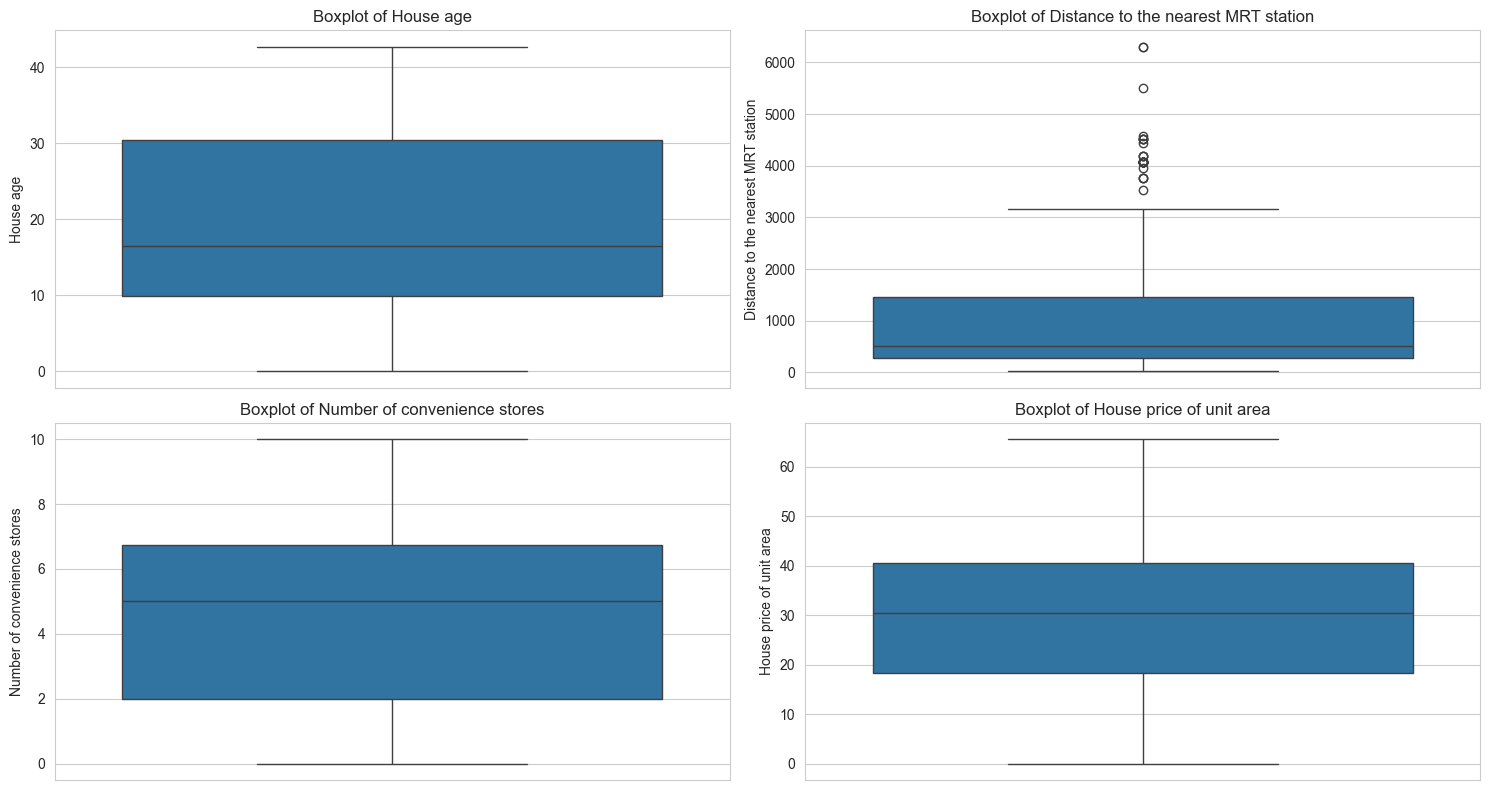

In [49]:
# Checking outliers
plt.figure(figsize=(15, 8))
faeatures = ['House age', 'Distance to the nearest MRT station',
             'Number of convenience stores', 'House price of unit area']

for i, col in enumerate(faeatures, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=real_estate_data[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

Observe that House age Most houses are between 10–30 years old.
A few houses are close to 0 years (new) or >40 years (old)
No extreme outliers — the data looks reasonable.

Distance to the nearest MRT station Strong right skew (long tail).
Most houses are within 0–2000 meters of a station.
A few houses are very far (4000–6000 meters), which show up as outliers (dots above whisker).

These extreme distances may affect the regression model because they can dominate the scale.

Number of convenience stores Houses usually have 2–7 stores nearby.
Range: 0 to 10 stores. No major extreme outliers here (though 0 stores might be unusual, but it makes sense in some locations).

House price of unit area (target variable) Most prices are 18–40.
Some houses have very high prices (>60), and a few have 0 price, which is strange (likely an error or unusual record).

Those 0 prices and very high ones are outliers and may distort model performance.

Summary from the plots
House age and convenience stores look fine.
Distance to MRT has a lot of extreme outliers (very far away houses).
House price per unit area has outliers (0 and very high values). 

In [53]:
# Dectecting outlier Using IQR method (Interquartile Range) 
numeric_data = real_estate_data.select_dtypes(include=['float64', 'int64'])
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5*IQR)))
print("Number of outlier in each columns:")
print(outliers.sum())

Number of outlier in each columns:
House age                               0
Distance to the nearest MRT station    34
Number of convenience stores            0
Latitude                                0
Longitude                               0
House price of unit area                0
dtype: int64


<Figure size 1000x600 with 0 Axes>

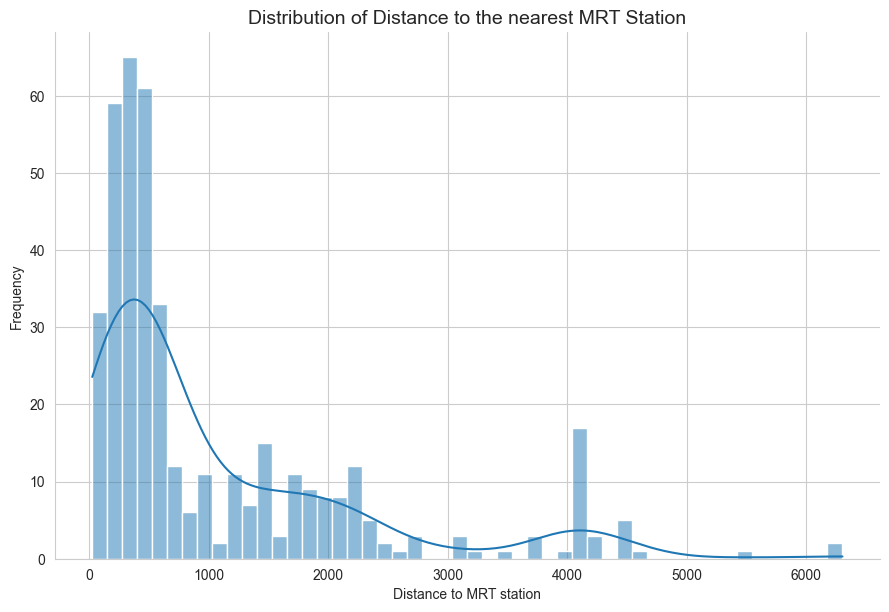

In [ ]:
# checking outlier using displot! how skew the distribution
plt.figure(figsize=(10, 6))
sns.displot(real_estate_data['Distance to the nearest MRT station'], bins=50, kde=True, height=6, aspect=1.5)
plt.title("Distribution of Distance to the nearest MRT Station", fontsize=14)
plt.xlabel('Distance to MRT station')
plt.ylabel('Frequency')
plt.show()

In [54]:
# Using Z-score method to dectecting outliers
z_scores = np.abs(stats.zscore(real_estate_data.select_dtypes(include=np.number)))
outliers_z = (z_scores > 3).sum(axis=0)

print("Number of outliers detected by z_score(>3):")
print(outliers_z)

Number of outliers detected by z_score(>3):
[0 3 0 0 0 0]


In [43]:
# Investigating suspicious cases. Check rows with 0 price suspicious
print(real_estate_data[real_estate_data['House price of unit area']==0])

#Checking rows with house age =0 
print(real_estate_data[real_estate_data['House age']==0])

#Checking extreme MRT distances
print(real_estate_data[real_estate_data['Distance to the nearest MRT station']> 4000])



               Transaction date  House age  \
17   2012-09-12 06:54:06.555817       10.3   
25   2012-09-20 13:50:20.328592       16.1   
49   2012-10-10 12:36:22.455568       13.5   
57   2012-10-15 07:23:33.287274       24.2   
63   2012-10-19 04:22:09.096118       38.2   
68   2012-10-24 10:01:12.581872       18.9   
81   2012-11-02 13:03:49.453579       16.3   
97   2012-11-16 08:44:19.839765        0.0   
200  2013-02-02 17:54:15.261898       34.0   
203  2013-02-05 03:27:08.014369       37.7   
221  2013-02-27 20:31:02.793398       17.2   
225  2013-03-05 01:48:02.626027       18.9   
229  2013-03-10 09:00:01.603250        4.7   
258  2013-03-26 06:16:06.360036        0.0   
276  2013-04-08 21:24:49.098976       21.7   
286  2013-04-17 06:31:21.100394       16.3   
293  2013-04-22 00:43:47.553163       40.9   
317  2013-05-09 18:19:00.018699       13.7   
322  2013-05-18 05:59:58.722533        6.3   
324  2013-05-19 08:57:45.581342       17.1   
326  2013-05-19 19:17:47.213861   

Final confirmation is that House price problem:
Many rows have 0.0 in "House price of unit area"
That doesn’t make sense — house price per unit area shouldn’t be 0.
These are either missing values encoded as 0 or invalid entries.
So in your dataset, you have two issues:
Outliers in Distance to MRT (skewed distribution).
Invalid zero values in House price of unit area (target leakage).

In [57]:
# removing rows where target variable (House price of unit area) is 0
real_estate_data = real_estate_data[real_estate_data['House price of unit area'] > 0]
print("Shape after removing invalid target rows:", real_estate_data.shape)

Shape after removing invalid target rows: (383, 7)


In [58]:
real_estate_data.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

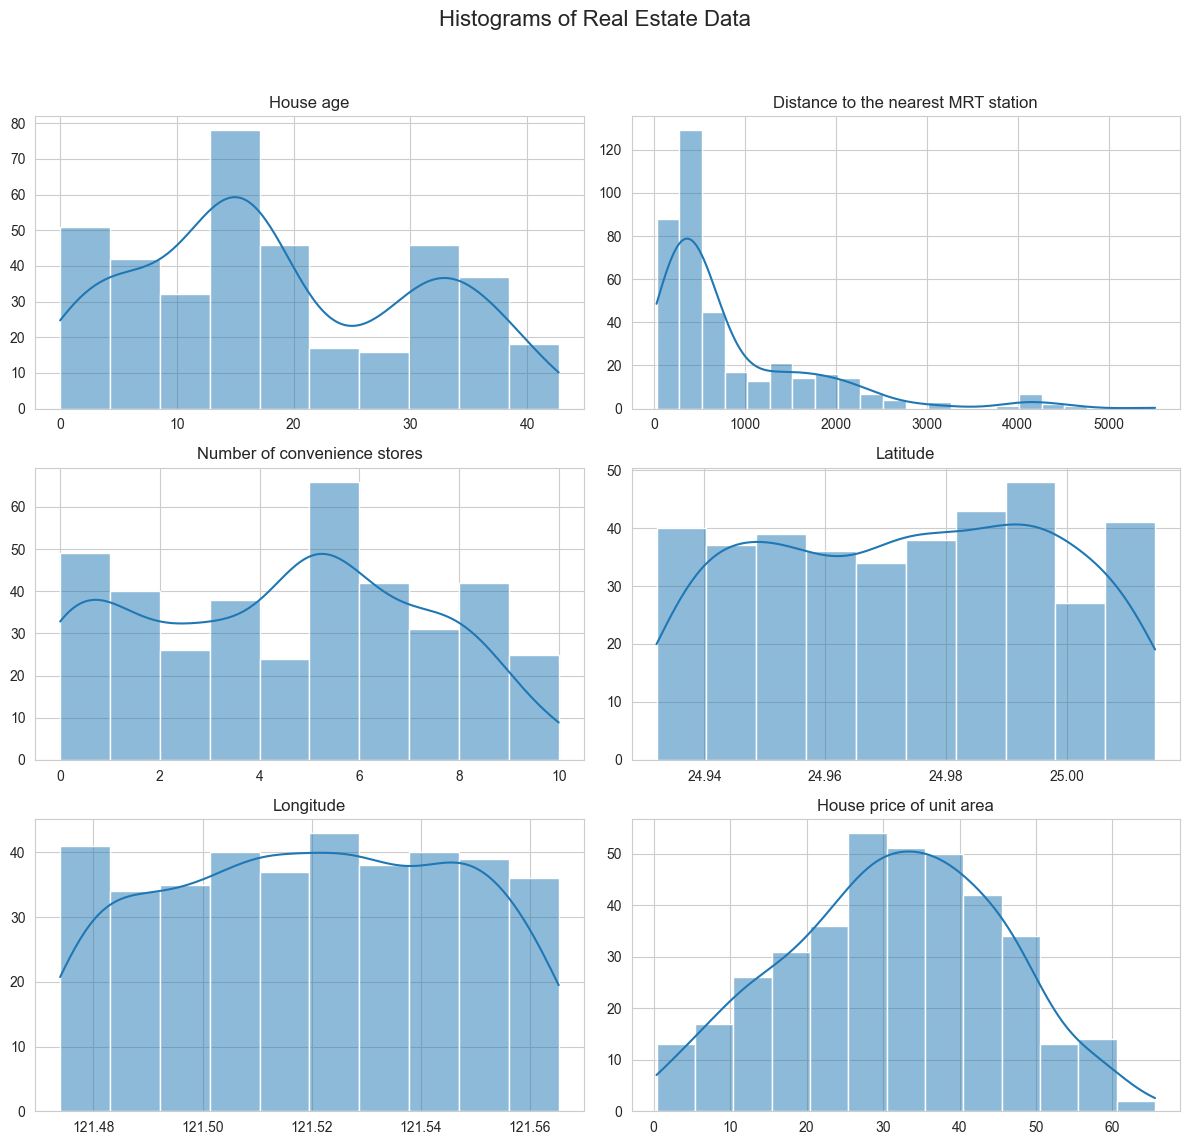

In [59]:
# set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize =(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(real_estate_data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The histograms provide insights into the distribution of each variable:

1.House Age: This shows a relatively uniform distribution with a slight     increase in the number of newer properties (lower age).

2.Distance to the Nearest MRT Station: Most properties are located close to an MRT station, as indicated by the high frequency of lower distances. There’s a long tail extending towards higher distances, suggesting some properties are quite far from MRT stations.

3.Number of Convenience Stores: Displays a wide range, with notable peaks at specific counts, like 0, 5, and 10. It suggests certain common configurations in terms of convenience store availability.

4.Latitude and Longitude: Both show relatively concentrated distributions, indicating that the properties are located in a geographically limited area.

5.House Price of Unit Area: Displays a right-skewed distribution, with a concentration of properties in the lower price range and fewer properties as prices increase.


# Creating a scatter plots to explote the relationships between these variables
# and the house price. It will help to understand which factors might be 
# Influencing property prices more significantly:

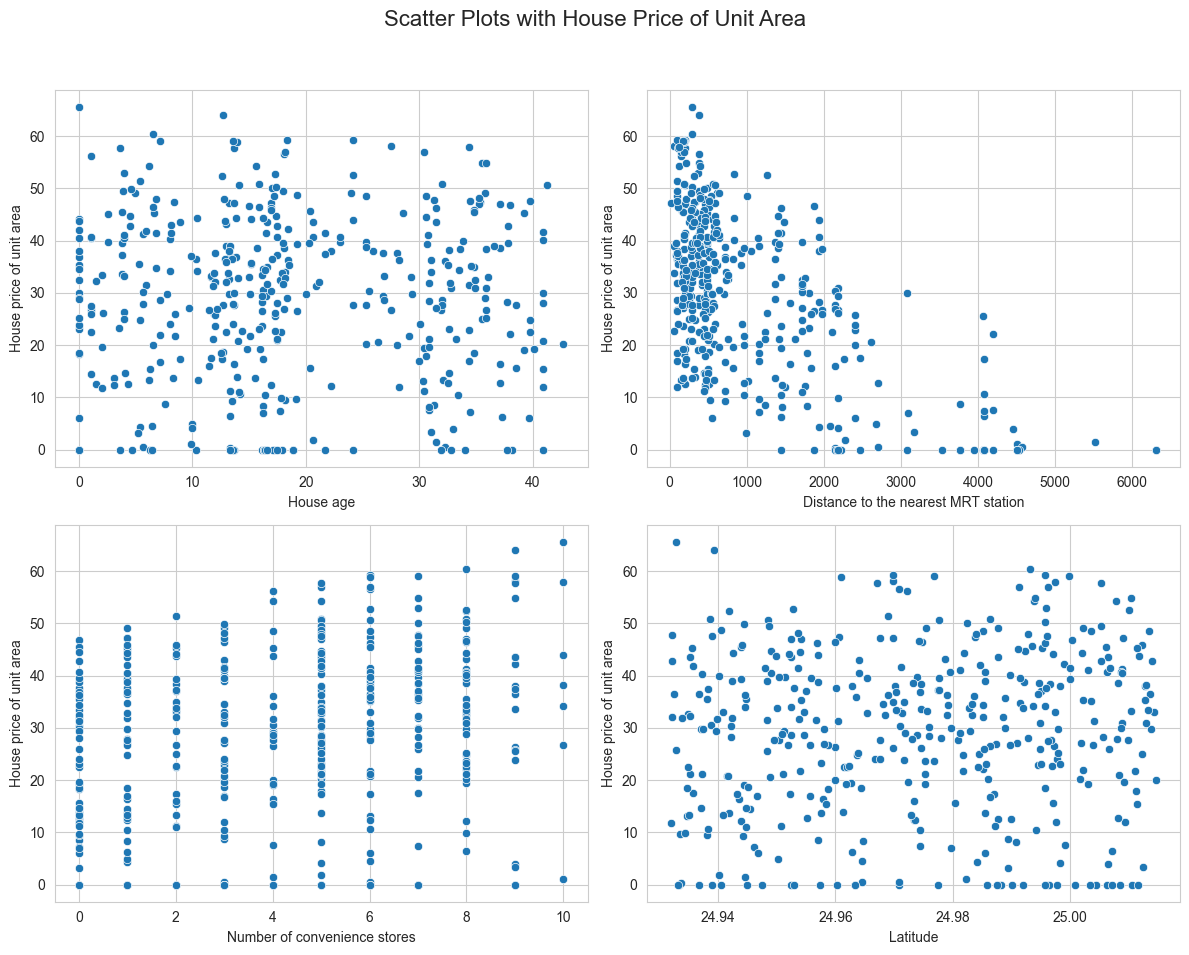

In [65]:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Scatter plot for each variable against the house price
sns.scatterplot(data=real_estate_data, x='House age', y='House price of unit area', ax=axes[0, 0])
sns.scatterplot(data=real_estate_data, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1])
sns.scatterplot(data=real_estate_data, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0])
sns.scatterplot(data=real_estate_data, x='Latitude', y='House price of unit area', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The scatter plots revealed interesting relationships between various factors and house prices:

1.House Age vs House Price: There doesn’t seem to be a strong linear relationship between house age and price. However, it appears that very new and very old houses might have higher prices.

2.Distance to the Nearest MRT Station vs. House Price: There is a clear trend showing that as the distance to the nearest MRT station increases, the house price tends to decrease. It suggests a strong negative relationship between these two variables.

3.Number of Convenience Stores vs House Price: There seems to be a positive relationship between the number of convenience stores and house prices. Houses with more convenience stores in the vicinity tend to have higher prices.

4.Latitude vs House Price: While not a strong linear relationship, there seems to be a pattern where certain latitudes correspond to higher or lower house prices. It could be indicative of specific neighbourhoods being more desirable.


Finally, it would be beneficial to perform a correlation analysis to quantify the relationships between these variables, especially how each one correlates with the house price:

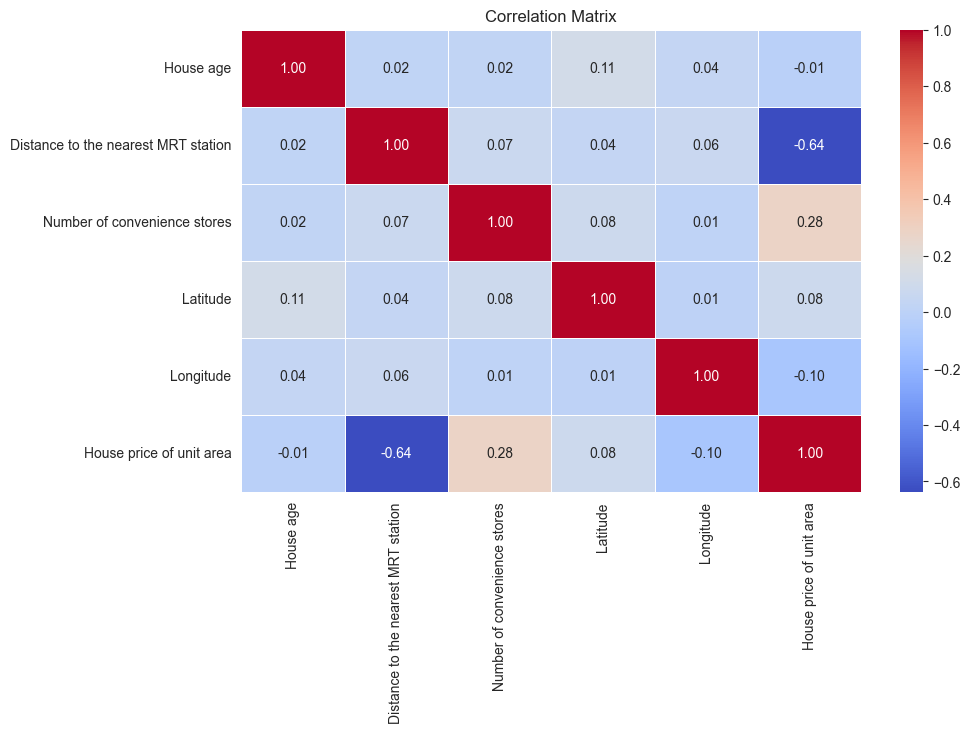

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [66]:
# Select only numeric columns
numeric_data = real_estate_data.select_dtypes(include=['number'])

# Correlation matrix
correlation_matrix = numeric_data.corr(method='pearson')

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

The correlation matrix provides quantified insights into how each variable is related to the others, especially with respect to the house price:

1.House Age: This shows a very weak negative correlation with house price (-0.012), implying that age is not a strong predictor of price in this dataset.

2.Distance to Nearest MRT Station: Has a strong negative correlation with house price (-0.637). It indicates that properties closer to MRT stations tend to have higher prices, which is a significant factor in property valuation.

3.Number of Convenience Stores: Displays a moderate positive correlation with house price (0.281). More convenience stores in the vicinity seem to positively affect property prices.

4.Latitude and Longitude: Both show a weak correlation with house prices. Latitude has a slight positive correlation (0.081), while longitude has a slight negative correlation (-0.099).

Overall, the most significant factors affecting house prices in this dataset appear to be the proximity to MRT stations and the number of convenience stores nearby. The geographical location (latitude and longitude) and the age of the house seem to have less impact on the price.


Building a regression model to predict the real estate prices by using the Linear Regression algorithm:

In [67]:
# Selecting features and target variable
faeatures = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = real_estate_data[faeatures]
y = real_estate_data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Initialization
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Visualize the actual versus predicted values to assess how well our model is performing:

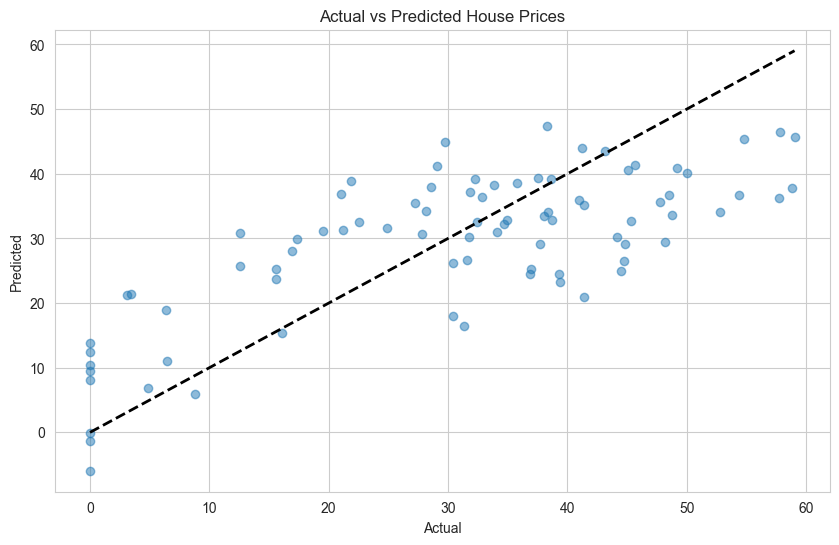

In [36]:
# Making predictions using the Linear Regression model
y_pred = model.predict(X_test)

# Visualization: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted House Prices")
plt.show()

The diagonal dashed line represents where the actual and predicted values would be equal. Points close to this line indicate accurate predictions. From the plot, we can observe:

* Many points are close to the diagonal line, suggesting that the model makes reasonably accurate predictions for a significant portion of the test set.

* Some points are further from the line, indicating areas where the model’s predictions deviate more significantly from the actual values.


In [68]:
# To evaluate the model performance more deeply: 
# Quantitative Metrics along with the plot, calculate regression metrics:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absulute Error (MAE):",mae)
print("R2 Score:", r2)


Mean Squared Error (MSE): 124.57938927549698
Root Mean Squared Error (RMSE): 11.161513753765526
Mean Absulute Error (MAE): 9.518038948836525
R2 Score: 0.5496730640943475


MSE / RMSE -> penalizes large errors (lower is better)
but getting MSE = 124.58 On average, squared errors are ~124. Large errors are penalized more heavily.

MAE -> average error size (easier to interpret) Well! MAE = 9.52 On average,
predictions are ~9.5 units off from the actual values

R2 -> how much variance in target is explained by model 
(closer to 1 better).

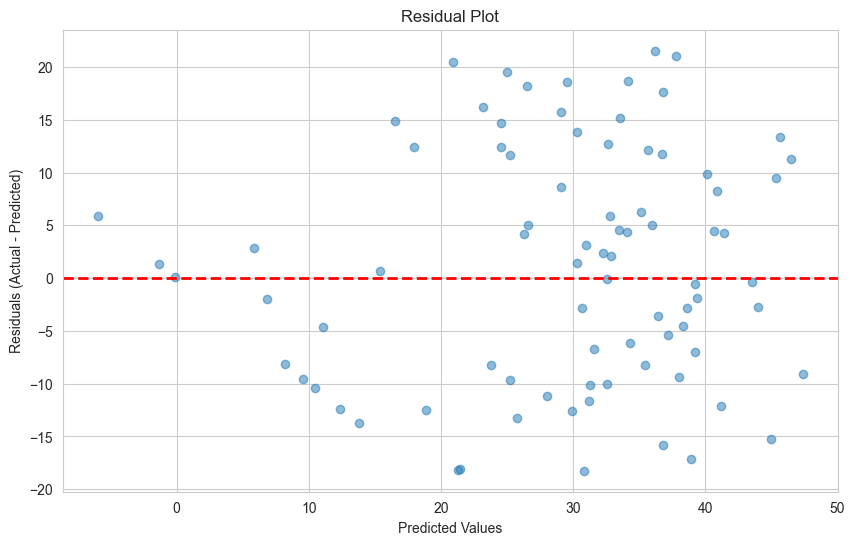

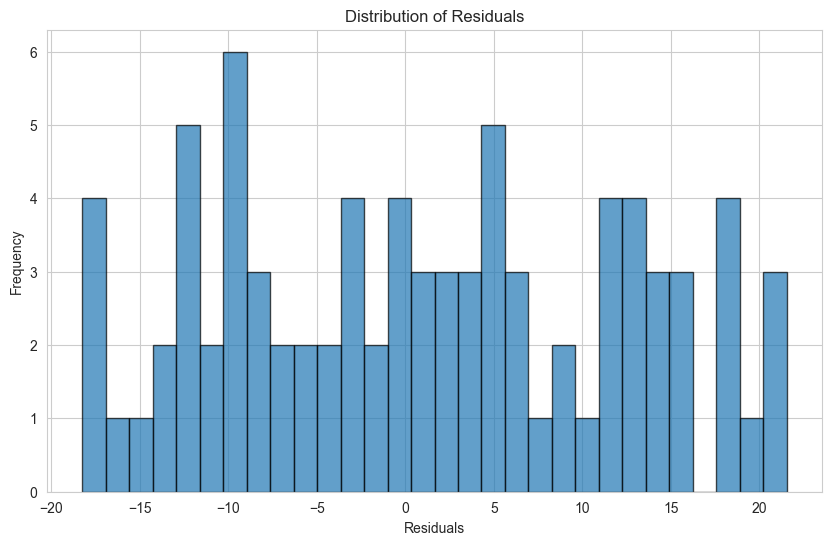

In [69]:
# Residuals
residuals = y_test - y_pred

# Scatter plot of residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


Summary
Real Estate Price Prediction is the process of estimating or forecasting the future prices of real estate properties, such as houses, apartments, or commercial buildings. The goal is to provide accurate property rates to buyers, sellers, investors, and real estate professionals to make informed decisions about real estate transactions.